In [1]:
import sys
sys.path.append('../src')

import matplotlib.pyplot as plt
import pandas as pd
import torch
from runpy import run_path 
from torch.utils.data import DataLoader

from data.dataset import OCRBarcodeDataset

In [2]:
dataset = OCRBarcodeDataset(
    images_dir='../data/barcodes-annotated-gorai/images',
    annot_df=pd.read_table(
        '../data/barcodes-annotated-gorai/full_annotation.tsv',
        sep='\t',
        dtype={'filename': str, 'code': str}
    ),
    add_border=5,
    img_height=128,
    img_width=512,
)

dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

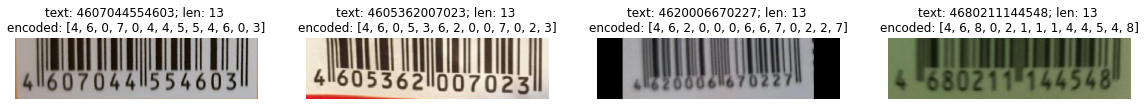

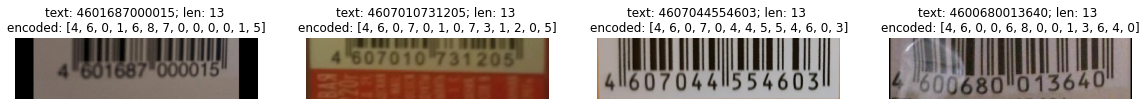

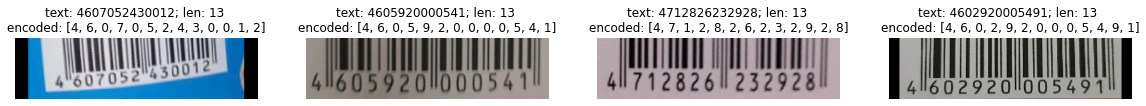

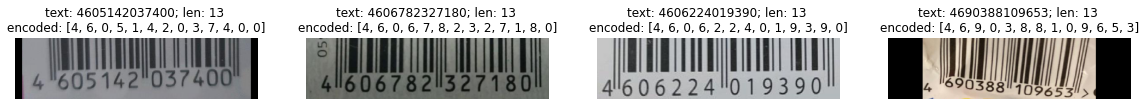

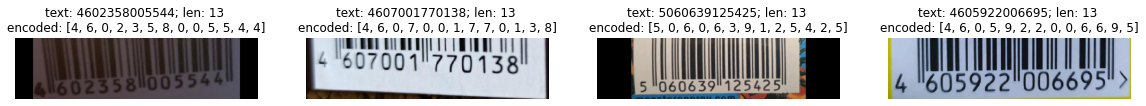

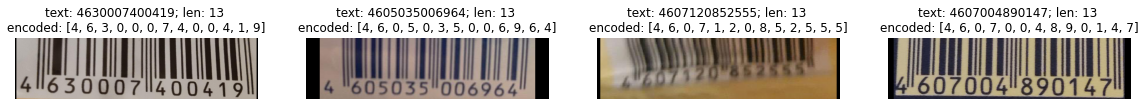

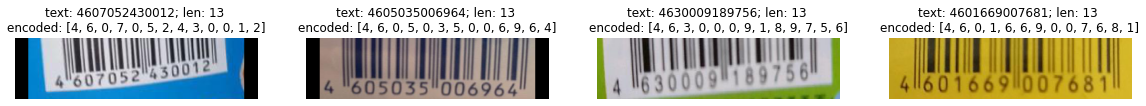

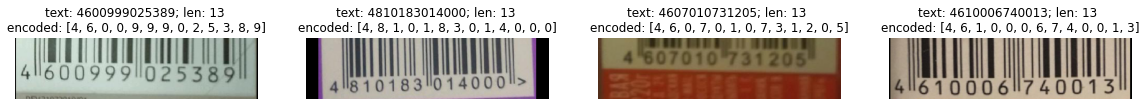

In [3]:
for _ in range(8):
    images, text, encoded_text, target_length = next(iter(dataloader))

    fig, axs = plt.subplots(1, images.shape[0], figsize=(20, 20))

    for i, ax in enumerate(axs):
        ax.imshow(images[i].permute(1, 2, 0))
        ax.axis('off')
        ax.set_title(f'text: {text[i]}; len: {target_length[i]} \nencoded: {encoded_text[i].tolist()}')
        ax.set_xlabel(f'encoded: {encoded_text[i].tolist()}')
